<a href="https://colab.research.google.com/github/MrMazagngy/EDA_Of_The_Brazilian_E_Commerce_Dataset/blob/main/EDA_Of_The_Brazilian_E_Commerce_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)`In this notebook , I did an Exploratory Data Analysis(EDA) plus some predictions of the (Brazilian E-Commerce Public Dataset by Olist) on  Kaggle by answering the following questions : `


**1:** city with most number of purchases + map of all cities each 
with no of purchases

**2:** Who are the top 5 best sellers


**3:** Top 5 product + Top 5 categories

**4:** Payment types used

**5:** average order value by week days

**6:** Difference in estimated & delievery times

**7:** customer segmentation

**8:** sales predictions (In Progress)


In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mazagngy","key":"12ae456c447888b919d9f0a2bc556049"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
 ! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14196  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8521  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3811  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3206  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

 89% 38.0M/42.6M [00:00<00:00, 58.0MB/s]
100% 42.6M/42.6M [00:00<00:00, 108MB/s] 


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

customers_dataset = pd.read_csv('olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
orders_datase = pd.read_csv('olist_orders_dataset.csv')
products_datase = pd.read_csv('olist_products_dataset.csv')
sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation_datase = pd.read_csv('product_category_name_translation.csv')

#all_datasets = pd.concat([customers_dataset.reset_index(drop=True), geolocation_dataset.reset_index(drop=True),order_items_dataset,order_reviews_dataset,order_payments_dataset,orders_datase,products_datase,sellers_dataset,product_category_name_translation_datase], axis=1)


In [ ]:
orders_datase

order_id  ... order_estimated_delivery_date
0      e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1      53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2      47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3      949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4      ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00
...                                 ...  ...                           ...
99436  9c5dedf39a927c1b2549525ed64a053c  ...           2017-03-28 00:00:00
99437  63943bddc261676b46f01ca7ac2f7bd8  ...           2018-03-02 00:00:00
99438  83c1379a015df1e13d02aae0204711ab  ...           2017-09-27 00:00:00
99439  11c177c8e97725db2631073c19f07b62  ...           2018-02-15 00:00:00
99440  66dea50a8b16d9b4dee7af250b4be1a5  ...           2018-04-03 00:00:00

[99441 rows x 8 columns]

**Exploring Dataset**

In [ ]:
customers_dataset.isnull().sum()
order_items_dataset.isnull().sum()
order_payments_dataset.isnull().sum()
orders_datase.isnull().sum()
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

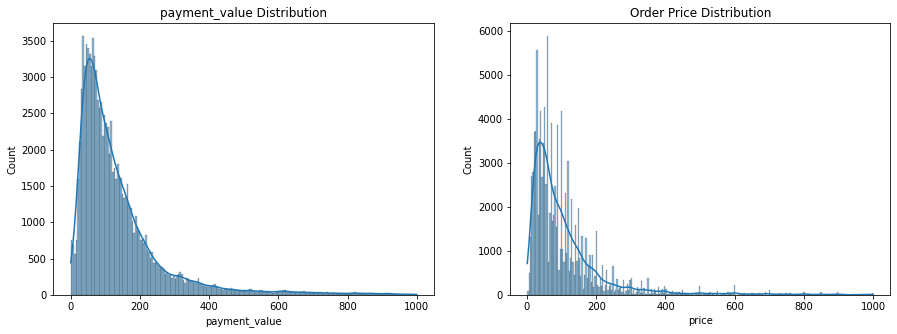

In [ ]:
# Since only few values are above 1000 in both [payment_value] & [order_price] ; we only visualize values less than 1000
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

order_payments_less_1000 = order_payments_dataset[order_payments_dataset['payment_value'] < 1000]
sns.histplot(data=order_payments_less_1000, x="payment_value", kde=True,ax=axes[0])
axes[0].set_title('payment_value Distribution')

order_items_less_1000 = order_items_dataset[order_items_dataset['price'] < 1000]
sns.histplot(data=order_items_less_1000, x="price", kde=True,ax=axes[1])
axes[1].set_title('Order Price Distribution')

plt.show()


# Question 1 : 
**city with most number of purchases + map of all cities each with no of purchases?**


In [ ]:
customers_dataset = geolocation_dataset.groupby('geolocation_state').size().sort_values()
customers_dataset

geolocation_state
RR       646
AP       853
AC      1301
AM      2432
RO      3478
SE      3563
TO      3576
AL      4183
PI      4549
RN      5041
PB      5538
MA      7853
MS     10431
PA     10853
CE     11674
MT     12031
DF     12986
PE     16432
ES     16748
GO     20139
BA     36045
SC     38328
PR     57859
RS     61851
RJ    121169
MG    126336
SP    404268
dtype: int64

In [ ]:
count_state = geolocation_dataset['geolocation_state'].value_counts()
count_state

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

In [ ]:
#filter order_payments_dataset and check how many values are above 1000
order_payments_dataset.sort_values(by='payment_value', ascending=False)
order_payments_filtered = order_payments_dataset[order_payments_dataset['payment_value'] > 1000]['payment_value'].value_counts()
order_payments_filtered

1479.51    5
2026.54    5
1471.51    4
1232.85    4
1149.83    4
          ..
1738.17    1
1055.86    1
2022.33    1
1830.99    1
2616.00    1
Name: payment_value, Length: 1023, dtype: int64


# Question 2 : 
**Who are the top 10 sellers?**

Text(0.5, 1.0, 'Top 10 sellers')

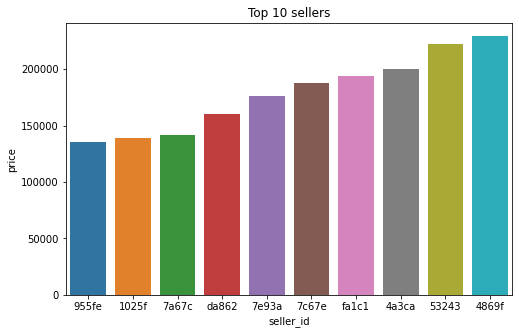

In [ ]:
#Shortren seller ids for easier visualization 
order_items_dataset['seller_id'] = order_items_dataset['seller_id'].apply(lambda x : x[:5] )
top_10_sellers = order_items_dataset.groupby('seller_id').sum().sort_values(by='price').reset_index().tail(10)

rcParams['figure.figsize'] = 8,5
sns.barplot(x="seller_id", y="price", data=top_10_sellers).set_title('Top 10 sellers')


# Question 3 : 
**A. What Are The TOP 5 Most Bought Product Categories**


Text(0.5, 1.0, 'TOP 5 Most Bought Product Categories')

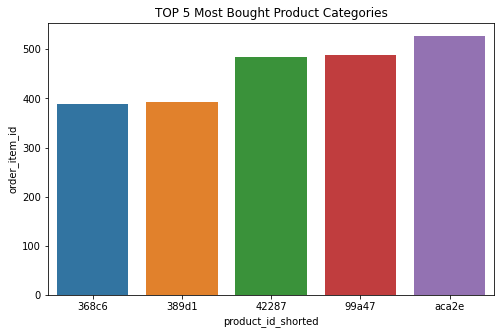

In [ ]:
order_items_dataset['product_id_shorted'] = order_items_dataset['product_id'].apply(lambda x : x[:5] )
top_5_categories = order_items_dataset.groupby('product_id_shorted').count().sort_values('order_item_id').reset_index().tail(5)

rcParams['figure.figsize'] = 8,5
sns.barplot(x="product_id_shorted", y="order_item_id", data=top_5_categories).set_title('TOP 5 Most Bought Product Categories')



**B. What Are The TOP 5 Most Bought Products**

Text(0.5, 1.0, 'TOP 5 Products ')

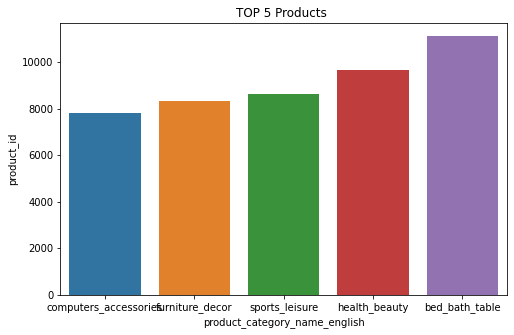

In [ ]:
order_product=pd.merge(order_items_dataset,products_datase,on='product_id',how='left')
products_english_names = pd.merge(order_product,product_category_name_translation_datase,on='product_category_name',how='left')
TOP_5_products = products_english_names.groupby('product_category_name_english').count().sort_values('product_id').reset_index().tail(5)


rcParams['figure.figsize'] = 8,5
sns.barplot(x="product_category_name_english", y="product_id", data=TOP_5_products).set_title('TOP 5 Products ')


# Question 4 : 
**Payment Types Used**

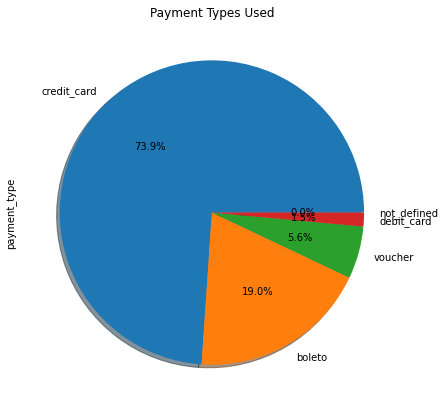

In [ ]:
order_payments_dataset['payment_type'].value_counts().plot.pie( figsize=(7, 7),autopct='%1.1f%%' ,
                   shadow=True,title="Payment Types Used")

# Question 5 : 
**Average Orders Values Per Weekday**

In [ ]:
#Convert order_purchase_timestamp to weekdays
from datetime import datetime
orders_datase['order_purchase_timestamp'] =  pd.to_datetime(orders_datase['order_purchase_timestamp'],format='%Y-%m-%d')
datetime.date(orders_datase['order_purchase_timestamp'][0]).strftime('%A')
orders_datase['order_purchase_day'] = orders_datase['order_purchase_timestamp'].apply(lambda x : datetime.date(x).strftime('%A'))

Text(0.5, 1.0, 'Average Orders Values Per Weekday')

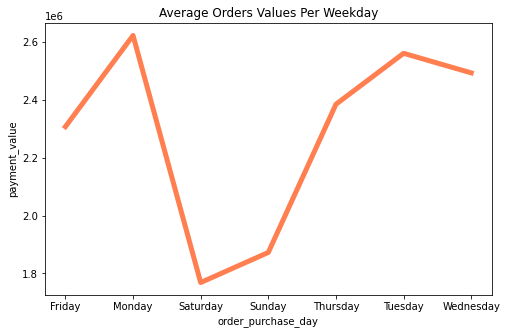

In [ ]:
total_order_values = pd.merge (orders_datase,order_payments_dataset,on='order_id',how='left')
total_order_values = total_order_values.groupby('order_purchase_day').sum().reset_index()

rcParams['figure.figsize'] = 8,5
sns.lineplot(x='order_purchase_day', y='payment_value', data=total_order_values, color="coral", linewidth=5,
            markers=True,dashes=False).set_title('Average Orders Values Per Weekday')


# Question 6 : 
**Percentage Of Delayed Delivery**

In [ ]:
#convert both (order_delivered_customer_date) & (order_estimated_delivery_date) to datetime
orders_datase['order_delivered_customer_date'] =  pd.to_datetime(orders_datase['order_delivered_customer_date'],format='%Y-%m-%d')
orders_datase['order_estimated_delivery_date'] =  pd.to_datetime(orders_datase['order_estimated_delivery_date'],format='%Y-%m-%d')
#filter by delayed deliveries
delayed_deliveries = orders_datase[orders_datase['order_delivered_customer_date'] > orders_datase['order_estimated_delivery_date']]

number_delayed_deliveries = len(delayed_deliveries.index)
total_number_deliveries = len(orders_datase.index)

print('Percentage of delayed deliveries is :',round(number_delayed_deliveries/total_number_deliveries * 100,2))

Percentage of delayed deliveries is : 7.87


# Question 7 : 
**Customer Segmentation**

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [ ]:
features = pd.merge (orders_datase,order_payments_dataset,on='order_id',how='left')
total_num_orders = features.groupby('customer_id')['order_id'].count().reset_index()
total__orders_value = features.groupby('customer_id')['payment_value'].sum().reset_index()
total__orders_value

In [ ]:
paymemt_types = pd.get_dummies(features, columns=['payment_type'])
paymemt_types = paymemt_types.groupby('customer_id')['payment_type_boleto','payment_type_credit_card','payment_type_debit_card','payment_type_not_defined','payment_type_voucher'].sum().reset_index()
paymemt_types

In [ ]:
filtered_features = pd.merge(pd.merge(total_num_orders,total__orders_value,on='customer_id'),paymemt_types,on='customer_id')
filtered_features = filtered_features.drop('customer_id',axis=1)
filtered_features

In [ ]:
#Feature Selection
X= filtered_features[['order_id' , 'payment_type_boleto','payment_type_credit_card','payment_type_debit_card','payment_type_not_defined','payment_type_voucher']]

pca = PCA()
pca.fit(X)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component to determine the optimal PCA component number
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

In [ ]:
#As seen in the graph above , 3 PCA will preserve 80% of the features
pca = PCA(n_components=3)
X = pca.fit_transform(X)

In [ ]:
#Elbow Method showing the optimal number of clusters
w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [ ]:
 #Apply KMeans 
kmean = KMeans(n_clusters=4)

fit_clusters= kmean.fit_predict(X)

PCA_df=pd.DataFrame(X, columns=['a','b','c']) 
PCA_df['cluster']=pd.Series(fit_clusters)

In [ ]:
fig = px.scatter_3d(PCA_df, x= 'a', y= 'b',z = 'c',
                   color='cluster',labels={'x':'PC 1', 'y':'PC 2','z':'PC 3'} )

fig.update_layout(
    autosize=False,
    width=400,
    height=400,)

fig.show()

In [ ]:
#Groupby labels to draw conclusions on each label
filtered_features['labels'] = PCA_df['cluster']
filtered_features.groupby('labels').sum()

order_id  payment_value  ...  payment_type_not_defined  payment_type_voucher
labels                           ...                                                
0          22510   3.220818e+06  ...                       3.0                1194.0
1          74548   1.239743e+07  ...                       0.0                   0.0
2           1143   2.464060e+04  ...                       0.0                1077.0
3           5686   3.659823e+05  ...                       0.0                3504.0

[4 rows x 7 columns]